# Removing Color

Complete the following tasks to convert a color picture into black and white.

In [1]:
# Don't modify this cell, just run it. 

import numpy as np
import matplotlib.pyplot as plt
from EC_CV import *
%config InlineBackend.figure_formats = 'retina'
from matplotlib import rcParams
import cv2

rcParams['figure.figsize'] = (10, 8)


In [22]:
# Task #1: Print a color image
#
# Copy an image file of your own in this folder, 
# open it and display it.

# Write your code here
img = cv2.imread('mrChuong.jpg')
print(np.shape(img))
print(img[0,0])
# blue = img[:,:,0]
# green = img[:,:,1]
# red = img[:,:,2]
# img1 = np.uint8(np.zeros(np.shape(img)))
# img1[:,:,0] = red
# img1[:,:,1] = green
# img1[:,:,2] = blue
# print(np.shape(img1))
# print(img1[0,0])
img2 = np.flip(img, 2)
print(img2[0,0])


# Custom window
cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
cv2.imshow('custom window', img)
cv2.resizeWindow('custom window', 575, 587)

cv2.waitKey(0)
cv2.destroyAllWindows()



(2305, 2391, 3)
[161 156 157]
[157 156 161]


In [8]:
# Task #2: Convert the color image to grayscale.
#
# Use the weights we used before:
#                              Red: 0.299
#                            Green: 0.587
#                             Blue: 0.114
#

# Write your code here
img = plt.imread('mrChuong.jpg')
print(np.shape(img))
# print(img[100,100])
# print(np.dot(img[...,:3], [0.299, 0.587, 0.114])[100,100])
# print(np.uint8(np.round(np.dot(img[...,:3], [0.299, 0.587, 0.114])[100,100], 0)))
img_gray = np.uint8(np.round(np.dot(img[...,:3], [0.299, 0.587, 0.114]),0))
print(np.shape(img_gray))
#plt.imshow(img_gray, 'gray')

(2305, 2391, 3)
(2305, 2391)


([<matplotlib.axis.XTick at 0x2511073dc70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

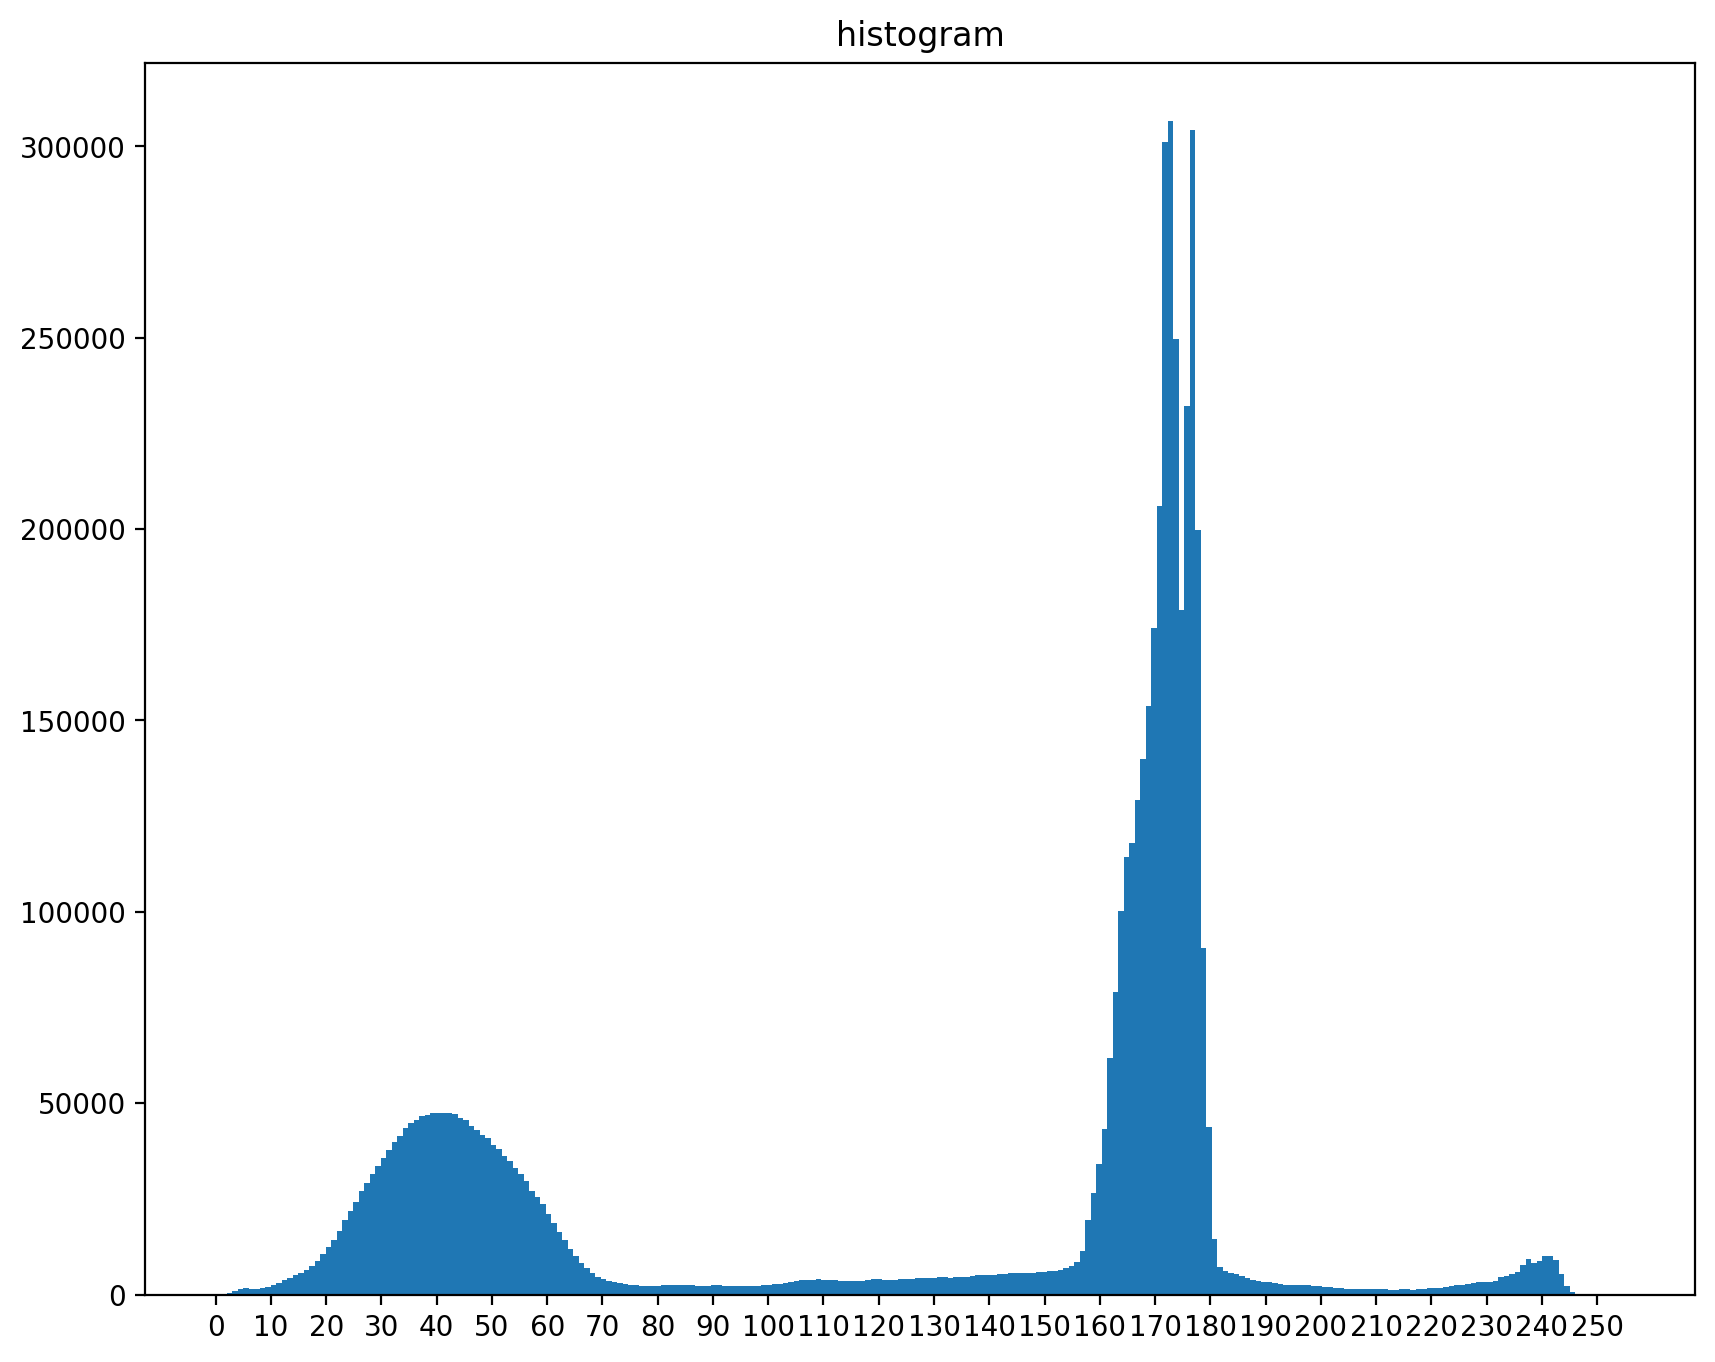

In [5]:
# Task #3: Plot a histogram 
#
# In this cell, plot a histogram of your grayscale image
# and try to come up with a suitable global threshold.

# Write your code here
plt.hist(img_gray.ravel(), 256, [0, 255])
plt.title('histogram')
plt.xticks(np.arange(0, 255, 10))


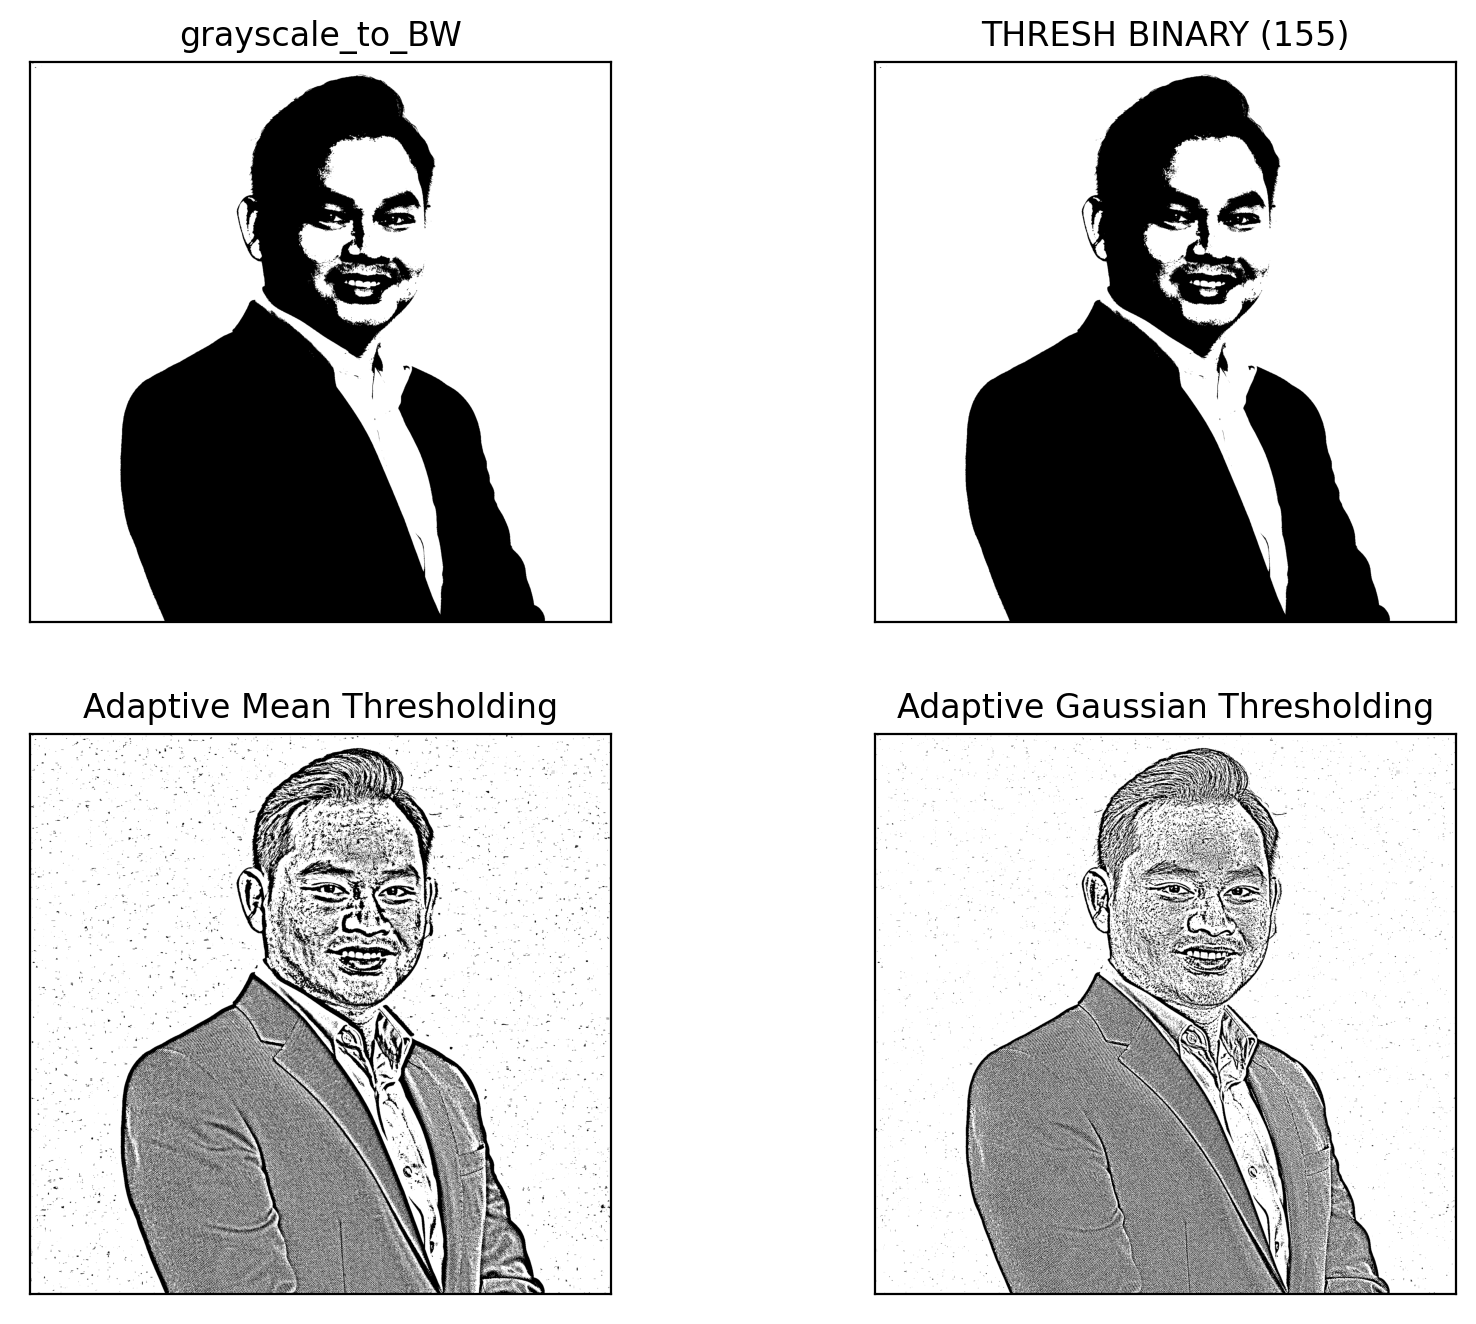

In [9]:
# Task #4: Compare two Black and White Images
#
# Pick two global thresholds from the histogram above and compare  
# the two resulting images. 
# Feel free to use OpenCV or grayscale_to_BW() from EC_CV.py

# Write your code here
threshold = 155
img_BW1 = grayscale_to_BW(img_gray, threshold)
ret, img_BW2 = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
img_BW3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 2)
img_BW4 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 33, 2)

titles = ['grayscale_to_BW', 'THRESH BINARY (' + str(threshold) + ')',
              'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_BW1, img_BW2, img_BW3, img_BW4]
rcParams['figure.figsize'] = [10, 8]
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
